In [1]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report, 
                             RocCurveDisplay,
                             roc_curve,
                             r2_score,
                             mean_squared_error,
                             auc, accuracy_score)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.io.arff import loadarff 

## Pre-settings

Carrega base:

In [2]:
df_data = pd.DataFrame(loadarff('dataset_6_letter.arff')[0])
df_data['class'] = df_data['class'].astype(str).str.extract("b'([A-Z])'")

Converte coluna de classificação de categórica para numérica:

In [3]:
df_data['class'] = pd.factorize(df_data['class'])[0]

Separa colunas de features (X) e coluna de classificação (y):

In [4]:
# Features
X = df_data.iloc[:,0:-1]
# Class
y = df_data.iloc[:,-1]

Divide conjunto de treinamento  (80%) e conjunto de teste (20%):

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Configura o stratified K-fold para o cross validation:

In [6]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=199)

## Grid Search

In [7]:
model = LogisticRegression()

parameters = {'penalty' : ['l2'],
              'solver':['lbfgs', 'newton-cg', 'saga'],
              'C':[0.5, 1]
              }

grid = GridSearchCV(estimator = model,             # 
                    param_grid = parameters,       # dicionário com valores para serem testados (Pares Chave-Valor)
                    scoring = 'accuracy',          # métrica de avaliação
                    cv = kf)                        # cross-validation

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia média:", grid.best_score_)         
# performance no dataset de teste
print(classification_report(y_test, grid.predict(X_test)))

Melhores parâmetros: {'C': 0.5, 'penalty': 'l2', 'solver': 'newton-cg'}
Melhor acurácia média: 0.77325
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       147
           1       0.87      0.84      0.86       161
           2       0.57      0.52      0.54       149
           3       0.56      0.47      0.51       147
           4       0.82      0.75      0.79       155
           5       0.85      0.85      0.85       157
           6       0.70      0.77      0.73       152
           7       0.87      0.87      0.87       158
           8       0.78      0.80      0.79       161
           9       0.83      0.92      0.87       153
          10       0.89      0.88      0.88       158
          11       0.71      0.74      0.73       148
          12       0.73      0.82      0.77       154
          13       0.68      0.65      0.66       150
          14       0.66      0.71      0.69       157
          15       0.83      0.7

## Métricas

### Matriz de confusão

Não aplicável.

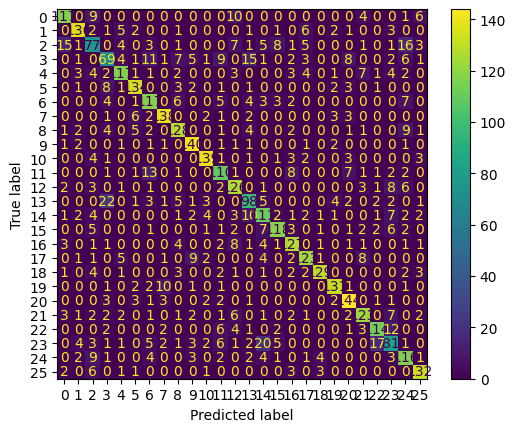

In [8]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=df_data['class'].unique()),display_labels=df_data['class'].unique()).plot()

### ROC

Não aplicável, pois utiliza-se 16 parâmetros.

In [9]:
#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
##Área sob a curva ROC (AUC)
#roc_auc = auc(fpr, tpr)
#disp_roc_curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
#                                 estimator_name=model.__class__.__name__)
#disp_roc_curve.plot()

### Erro médio quadrático

In [10]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 27.79375


### R2 Score

In [11]:
print("R2_score:", r2_score(y_test, y_pred))

R2_score: 0.5026971683722145


### Accuracy Score

In [12]:
print("Accuracy score:", accuracy_score(y_test,y_pred))

Accuracy score: 0.77375
